In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import altair as alt

In [43]:
# Function to scale selected fields and create a heatmap of the correlation matrix
def scale_and_plot_heatmap(df, fields_to_scale):
    """
    Scale the selected fields of a dataframe and plot a heatmap of their correlation matrix.

    Parameters:
    df (pd.DataFrame): Input dataframe.
    fields_to_scale (list): List of field names to scale and include in the correlation matrix.
    
    Returns:
    None
    """
    if not set(fields_to_scale).issubset(df.columns):
        raise ValueError("Some fields to scale are not in the dataframe.")

    # Scaling the selected fields
    scaler = MinMaxScaler()
    scaled_values = scaler.fit_transform(df[fields_to_scale])
    scaled_df = pd.DataFrame(scaled_values, columns=fields_to_scale)

    # Computing the correlation matrix
    correlation_matrix = scaled_df.corr()

    # Plotting the heatmap
    plt.figure(figsize=(25, 25))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
    plt.title("Correlation Heatmap of Scaled Fields")
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# User Input Required

In [66]:
# Import data
df = pd.read_csv(r"C:\Users\abhimanya.achara\OneDrive - priorpartners.com\Desktop\Corr4_Car ownership_Distance travelled to work.csv")
df.head()

,lsoa21cd,lsoa21nm,msoa21cd,msoa21nm,lad22cd,lad22nm,rgn22cd,rgn22nm,1 car or van in household,2 cars or vans in household,...,20km to less than 30km,2km to less than 5km,30km to less than 40km,40km to less than 60km,5km to less than 10km,60km and over,Less than 2km,"Works mainly at an offshore installation, in no fixed place, or outside the UK",Works mainly from home,impact_area
0,E01014485,Bristol 058A,E02006949,Bristol 058,E06000023,"Bristol, City of",E12000009,South West,435,154,...,5,197,22,20,72,13,165,132,510,Outside Impact Area
1,E01014486,Bristol 058C,E02006949,Bristol 058,E06000023,"Bristol, City of",E12000009,South West,515,136,...,15,251,15,10,83,11,331,196,539,Outside Impact Area
2,E01014487,Bristol 020A,E02003031,Bristol 020,E06000023,"Bristol, City of",E12000009,South West,351,156,...,1,126,10,8,58,12,188,91,598,Outside Impact Area
3,E01014488,Bristol 058B,E02006949,Bristol 058,E06000023,"Bristol, City of",E12000009,South West,444,130,...,7,161,12,17,75,16,169,129,588,Outside Impact Area
4,E01014489,Bristol 059A,E02006950,Bristol 059,E06000023,"Bristol, City of",E12000009,South West,507,156,...,8,186,10,18,101,18,318,135,730,Outside Impact Area


In [67]:
#run to see columns
df.columns

Index(['lsoa21cd', 'lsoa21nm', 'msoa21cd', 'msoa21nm', 'lad22cd', 'lad22nm',
       'rgn22cd', 'rgn22nm', '1 car or van in household',
       '2 cars or vans in household', '3 or more cars or vans in household',
       'No cars or vans in household', '10km to less than 20km',
       '20km to less than 30km', '2km to less than 5km',
       '30km to less than 40km', '40km to less than 60km',
       '5km to less than 10km', '60km and over', 'Less than 2km',
       'Works mainly at an offshore installation, in no fixed place, or outside the UK',
       'Works mainly from home', 'impact_area'],
      dtype='object')

In [68]:
#Input fields to scale
fields_to_scale = [
    '1 car or van in household',
       '2 cars or vans in household', '3 or more cars or vans in household',
       'No cars or vans in household', '10km to less than 20km',
       '20km to less than 30km', '2km to less than 5km',
       '30km to less than 40km', '40km to less than 60km',
       '5km to less than 10km', '60km and over', 'Less than 2km',
       'Works mainly at an offshore installation, in no fixed place, or outside the UK',
       'Works mainly from home'
]

# Run cell below to create Correlation Matrix

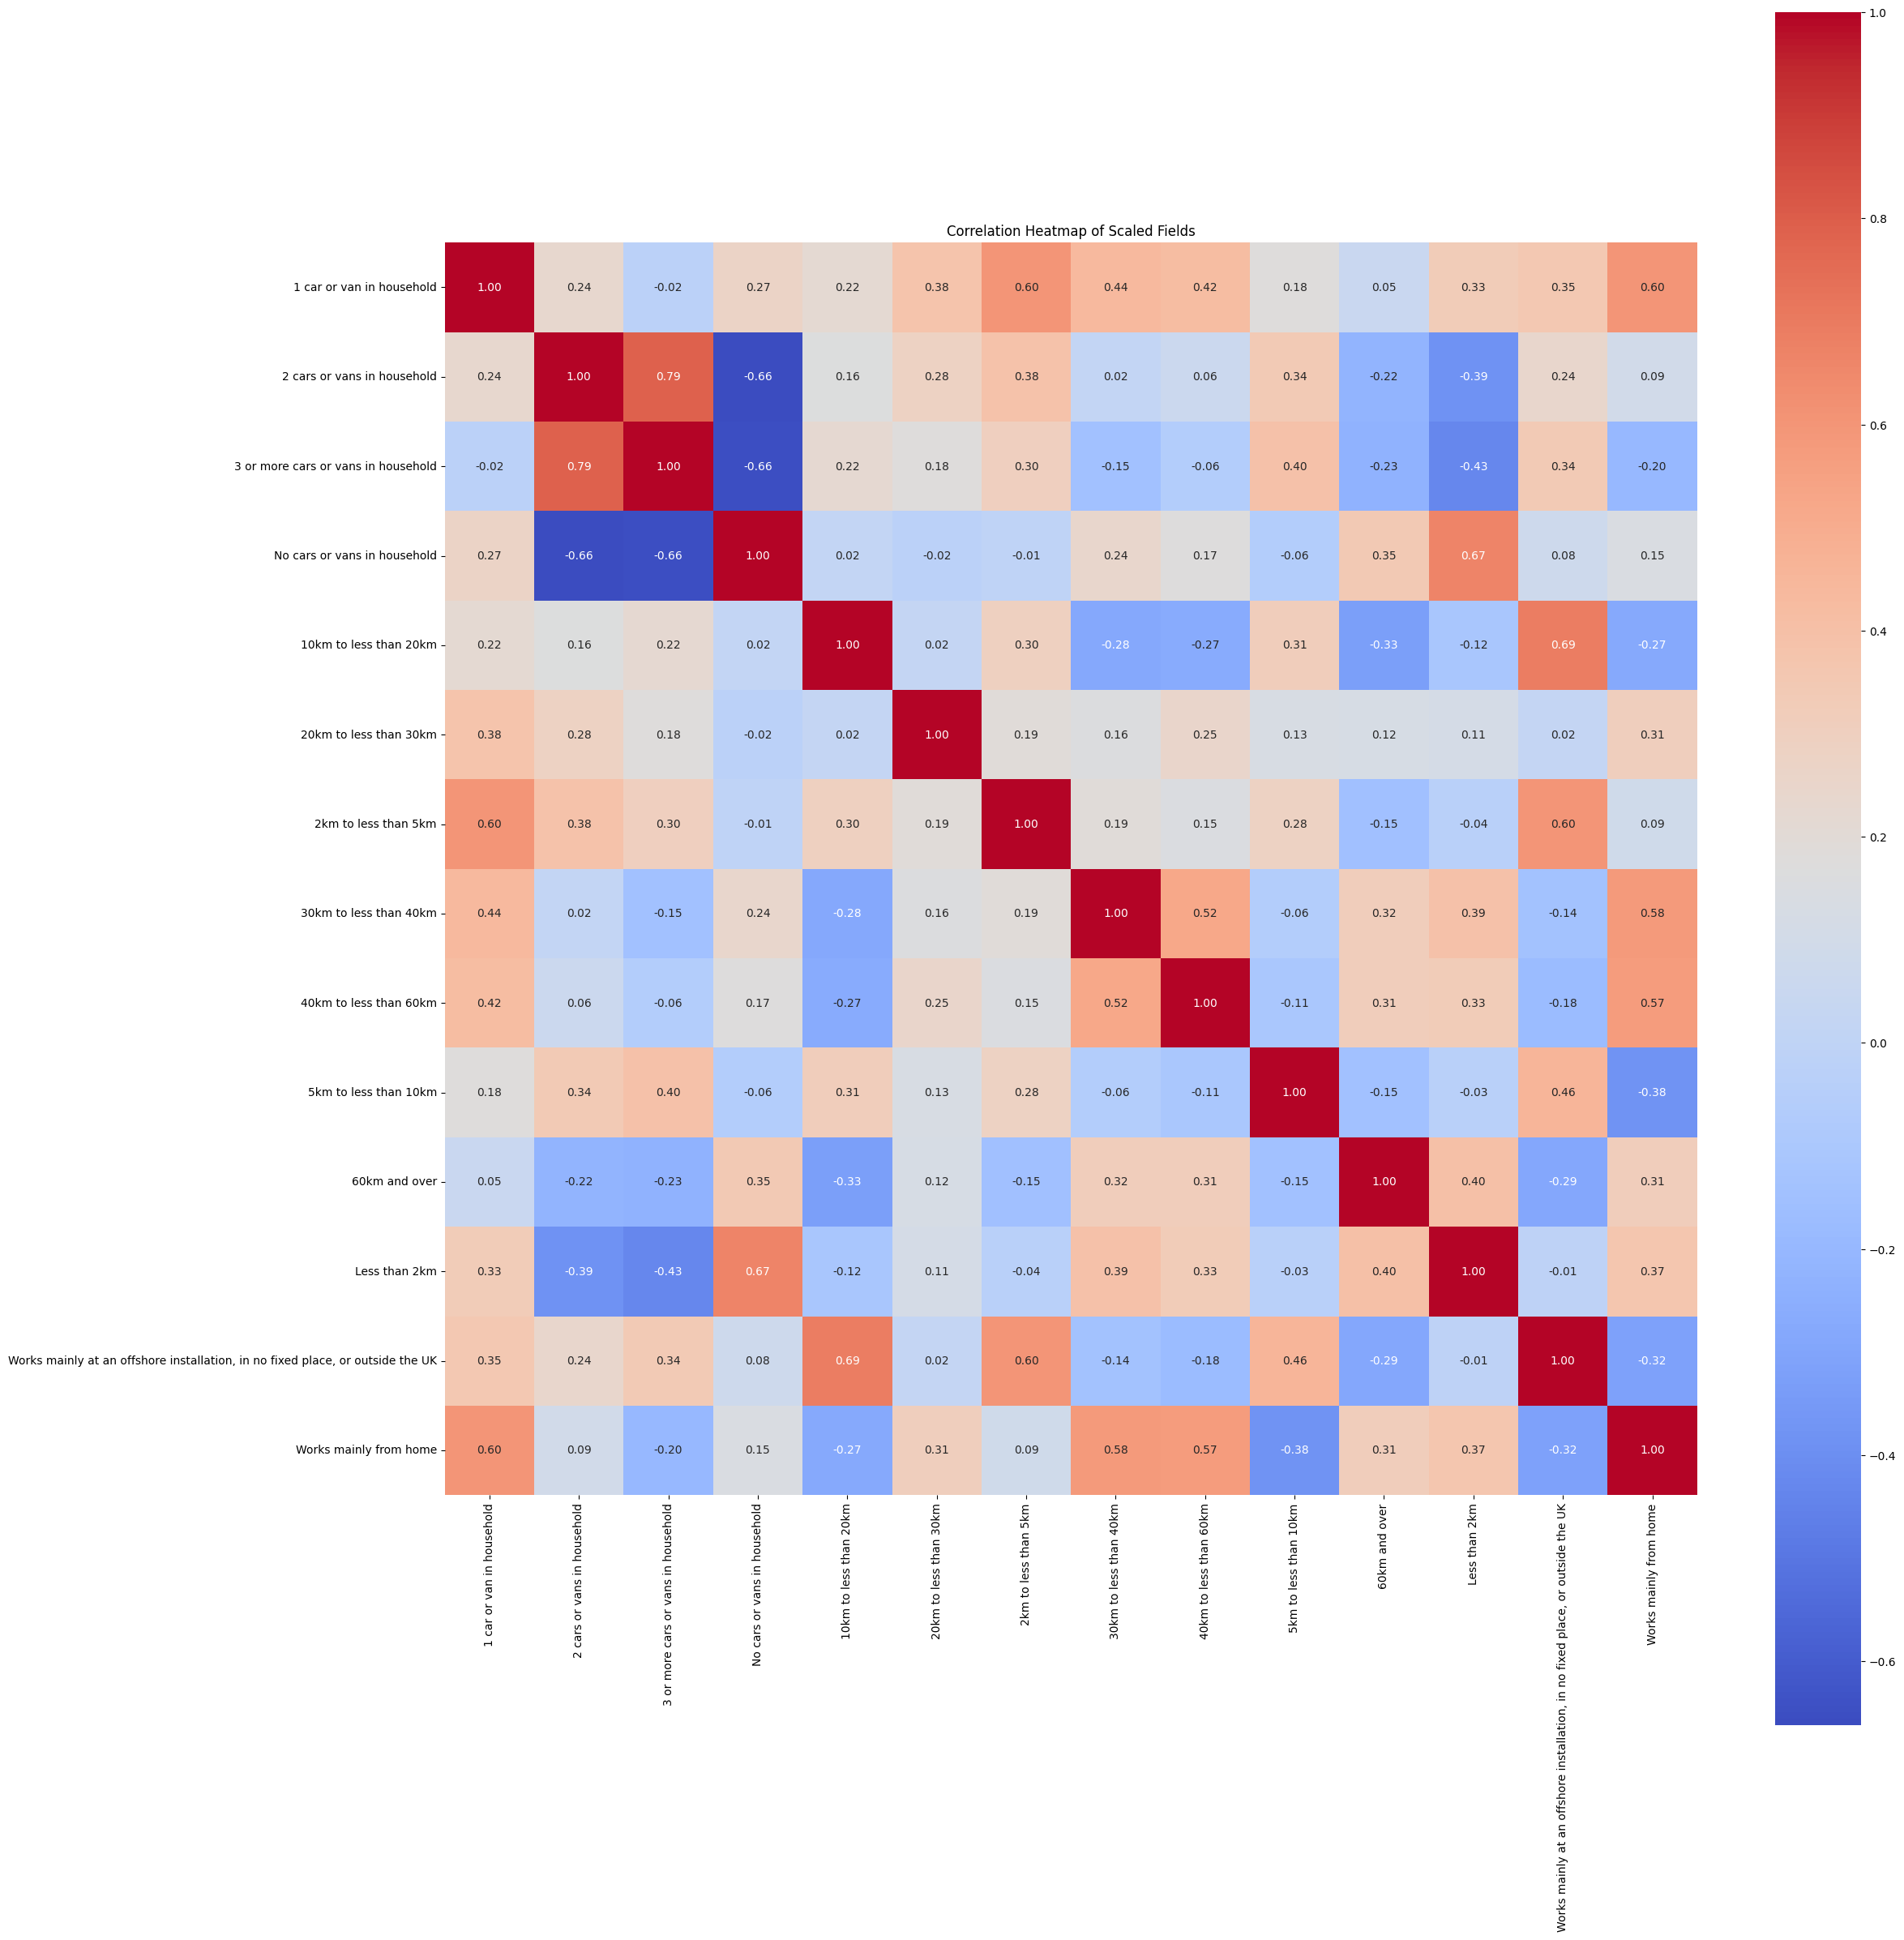

In [69]:
#Run cell to create correlation matrix
scale_and_plot_heatmap(df, fields_to_scale)

In [150]:
import altair as alt
import pandas as pd

# Altair scatter plot
def create_scatter_plot(df, x, x_label, y, y_label, colour, legend_title, chart_title, width, height, fit_line, fit_line_colour, fit_line_width, fit_line_type):
    scatter_plot = (
        alt.Chart(df)
        .mark_circle(size=60)
        .encode(
            x=alt.X(x, title=x_label),
            y=alt.Y(y, title=y_label),
            color=alt.Color(colour, title=legendtitle)
        )
        .properties(
            title=chart_title,
            width=width,
            height=height
        )
    )       
    
    if fit_line =='Yes':
        final_plot =  scatter_plot + scatter_plot.transform_regression(x,y).mark_line(color=fit_line_colour, strokeWidth=fit_line_width, strokeDash=fit_line_type).encode(color = 
     alt.Color(legend=None))
    else:
        final_plot =  scatter_plot        
    
    return final_plot   

In [153]:
#User to Input values

# input X variable
x = 'No cars or vans in household'

# input X axis title
x_label = 'Number of households with no cars or vans'

# input Y variable
y = 'Less than 2km'

# input Y axis title
y_label ='Number of people who travel less than 2km'

# input colour variable
colour = 'impact_area'

# input Legend title
legend_title = 'Legend'

# input chart title
chart_title = 'No cars or vans in household vs Number of people who travel less than 2km to work'

# input chart width
width = 600

# input chart height
height = 400

# do you want to include the line of best fit? Answer 'Yes' or 'No'
fit_line = 'Yes'

# input line of best fit colour
fit_line_colour = 'black'

# input line of best fit width
fit_line_width = 1

# input line of best fit dash type
fit_line_type = [3, 3]

In [154]:
#Display the plot
create_scatter_plot(df, x, x_label, y, y_label,colour,legend_title,chart_title,width,height,fit_line,fit_line_colour,fit_line_width,fit_line_type)

alt.LayerChart(...)